# Exercise 8 - density estimator
In order to sample from a distribution with a given density $f$, one way is to calculate the inverse of $g$ where $g$ is the corresponding cdf and then evaluate $g^{-1}(X)$ at $X\sim U(0,1)$. This is done by the following code

In [1]:
from numpy.random import uniform
from numpy import array,sqrt

def inverseCdf(x):
    if x<1/2:
        return sqrt(x/2)
    else:
        return 1-sqrt((1-x)/2)

# draw(n) will give you n randomly drawn elements from the distribution
def draw(n):
    K=array(uniform(0,1,n))
    return [inverseCdf(k) for k in K]

Next we implement the kernel and function that evaluates $\widehat{f_h}(x)$ given the samples $X_1,\ldots,X_n$

In [2]:
from numpy import abs

def kernel(x):
    if abs(x)>1:
        return 0
    else:
        return 3/4*(1-x**2)
    
    
def estimator(x,h,sample):
    n=len(sample)
    T=array((x-sample)/h)
    y=array([kernel(t) for t in T])
    return sum(y)/(n*h)

We now have everything we need in order to do the reconstructions: 

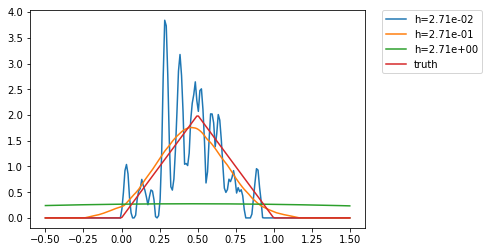

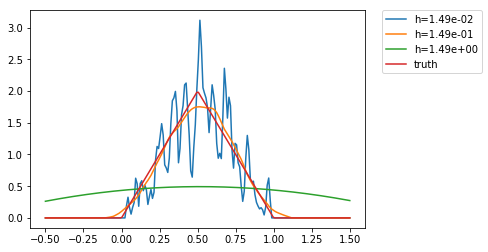

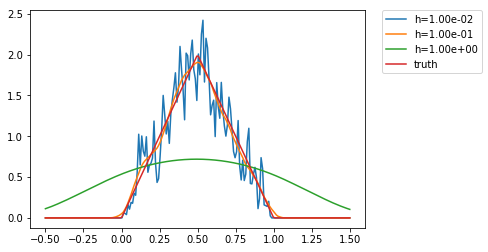

In [3]:
from numpy import linspace

t=linspace(-0.5,1.5,200)

def trueDensity(x):
    if abs(x-1/4)<=1/4:
        return 4*x
    elif abs(x-3/4)<=1/4:
        return 4-4*x
    else:
        return 0
    
truth=array([trueDensity(x) for x in t])

import matplotlib.pyplot as plt

n=50
sample=draw(n)
h=n**(-1/3)
y50=array([[estimator(x,h/10,sample) for x in t],[estimator(x,h,sample) for x in t],[estimator(x,10*h,sample) for x in t]])

plt.plot(t,y50[0],label='h={:1.2e}'.format(h/10))
plt.plot(t,y50[1],label='h={:1.2e}'.format(h))
plt.plot(t,y50[2],label='h={:1.2e}'.format(h*10))
plt.plot(t,truth,label='truth')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

n=300
sample=draw(n)
h=n**(-1/3)
y300=array([[estimator(x,h/10,sample) for x in t],[estimator(x,h,sample) for x in t],[estimator(x,10*h,sample) for x in t]])

plt.plot(t,y300[0],label='h={:1.2e}'.format(h/10))
plt.plot(t,y300[1],label='h={:1.2e}'.format(h))
plt.plot(t,y300[2],label='h={:1.2e}'.format(h*10))
plt.plot(t,truth,label='truth')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

n=1000
sample=draw(n)
h=n**(-1/3)
y1000=array([[estimator(x,h/10,sample) for x in t],[estimator(x,h,sample) for x in t],[estimator(x,10*h,sample) for x in t]])

plt.plot(t,y1000[0],label='h={:1.2e}'.format(h/10))
plt.plot(t,y1000[1],label='h={:1.2e}'.format(h))
plt.plot(t,y1000[2],label='h={:1.2e}'.format(h*10))
plt.plot(t,truth,label='truth')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

One can observe in the examples below that if $h$ is choosen to small (blue curves) then one has a very noisy reconstruction, so for higher $n$ one at least captures the general behaviour of the curve. If on the hand $h$ is choosen to large (green curves), then we smooth the result to much.

Note however that due to the results of Exercise 6 the choice $h\sim n^{-1/3}$ is a good choice of the parameter, since $f^\dagger$ in one time differentiable (neglecting the three kinks, more acurately $f^\dagger\in W^{1,\infty}$ and the analysis carries over from $C^1$). Hence all three parameter choice are order optimal in the limit of $n\rightarrow \infty$ only the obtained constants may not be optimal. As in the example the sample sizes are small the factors in front are large compared to $n^{-1/3}$ and hence lead to worse reconstructions.

If $f^\dagger\in C^2$ we could choose $h\sim n^{-1/5}$ to obtain a faster convergence (and hence better reconstructions for large enough $n$), since $\mu_1(K)=0$. Would $f^\dagger$ be even smoother one could however not further increase the rate, due to the fact that $\mu_2(K)\neq 0$.

At the end we plot the best obtained reconstructions in order to see the improvement of the result with sample size:

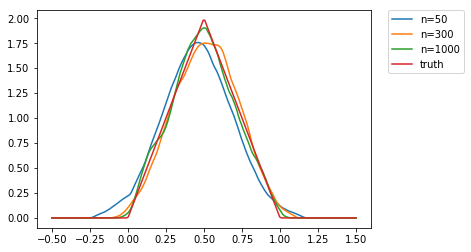

In [4]:
plt.plot(t,y50[1],label='n=50')
plt.plot(t,y300[1],label='n=300')
plt.plot(t,y1000[1],label='n=1000')
plt.plot(t,truth,label='truth')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()